Task 3 - Background Spectrum

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import utils
import importlib
import json
importlib.reload(utils)
pd.set_option('display.max_rows', None)


Matplotlib imported as plt: <module 'matplotlib.pyplot' from 'c:\\Users\\kearb\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>
Matplotlib imported as plt: <module 'matplotlib.pyplot' from 'c:\\Users\\kearb\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\matplotlib\\pyplot.py'>


In [2]:
#Import the data for the background spectrum
file_path = r'Data\Task 3\background 8.0 uS.TKA'
background_dict, total_time = utils.load_data(file_path)


In [3]:
#Conversions for dataframe
#Channels > energy
#Counts > counts per second
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

background_dict['Energy (keV)'] = channel_to_energy(background_dict['Channel'])

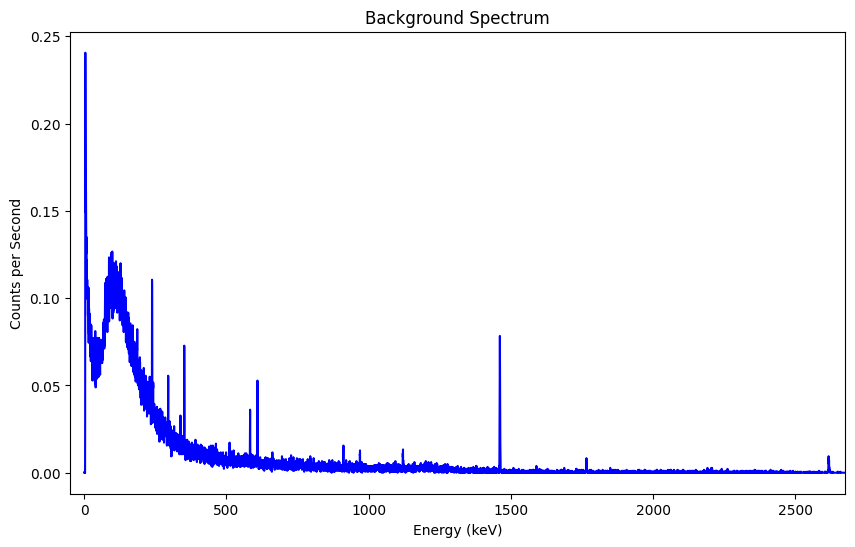

In [4]:
#Create a plot of the background spectrum
plt.figure(figsize=(10, 6))
plt.plot(background_dict['Energy (keV)'], background_dict['Counts per Second'], label='Background Spectrum', color='blue')
plt.title('Background Spectrum')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts per Second')
#plt.grid()
plt.xlim(left=-50, right=background_dict['Energy (keV)'].max())

plt.show()

In [5]:
# print(f"Data type: {type(background_dict)}")

# print(background_dict.keys())
# #Print a chart of all the background_dict data
# print(background_dict)

In [6]:
#Run the dataframe through the simple peak finder

peaks_dict = utils.find_peaks_simple(data={'Background': background_dict}, start_channel=5, channel_step=25, cutoff_value = 0.013, threshold_factor=2)


Data type: <class 'dict'>
Data keys: dict_keys(['Background'])
No peak found for Background in channel range 5 to 30 (Max: 0.24055555555555555, Avg:  0.2564 )
Updated to: 30 → 55
No peak found for Background in channel range 30 to 55 (Max: 0.11055555555555556, Avg:  0.18666666666666668 )
Updated to: 55 → 80
No peak found for Background in channel range 55 to 80 (Max: 0.09111111111111111, Avg:  0.15004444444444442 )
Updated to: 80 → 105
No peak found for Background in channel range 80 to 105 (Max: 0.07722222222222222, Avg:  0.1328888888888889 )
Updated to: 105 → 130
No peak found for Background in channel range 105 to 130 (Max: 0.0811111111111111, Avg:  0.1259111111111111 )
Updated to: 130 → 155
No peak found for Background in channel range 130 to 155 (Max: 0.07722222222222222, Avg:  0.12626666666666664 )
Updated to: 155 → 180
No peak found for Background in channel range 155 to 180 (Max: 0.07722222222222222, Avg:  0.1324 )
Updated to: 180 → 205
No peak found for Background in channel r

In [7]:
additional_peaks = utils.find_peaks_simple(data={'Background': background_dict}, start_channel=4600, channel_step=25, cutoff_value = 0.005, threshold_factor=2)

for key in additional_peaks.keys():
    if key in peaks_dict:
        #Append the new peaks to the existing peaks
        peaks_dict[key] = pd.concat([peaks_dict[key], additional_peaks[key]], ignore_index=True)
    else:
        #Create a new key in the peaks_dict
        peaks_dict[key] = additional_peaks[key]
print(peaks_dict['Background'])


Data type: <class 'dict'>
Data keys: dict_keys(['Background'])
No peak found for Background in channel range 4600 to 4625 (Max: 0.002777777777777778, Avg:  0.0013333333333333333 )
Updated to: 4625 → 4650
No peak found for Background in channel range 4625 to 4650 (Max: 0.0016666666666666668, Avg:  0.0012444444444444445 )
Updated to: 4650 → 4675
No peak found for Background in channel range 4650 to 4675 (Max: 0.0011111111111111111, Avg:  0.0010222222222222221 )
Updated to: 4675 → 4700
No peak found for Background in channel range 4675 to 4700 (Max: 0.0022222222222222222, Avg:  0.0008444444444444443 )
Updated to: 4700 → 4725
No peak found for Background in channel range 4700 to 4725 (Max: 0.0016666666666666668, Avg:  0.0011555555555555555 )
Updated to: 4725 → 4750
No peak found for Background in channel range 4725 to 4750 (Max: 0.0016666666666666668, Avg:  0.0007555555555555554 )
Updated to: 4750 → 4775
No peak found for Background in channel range 4750 to 4775 (Max: 0.0011111111111111111

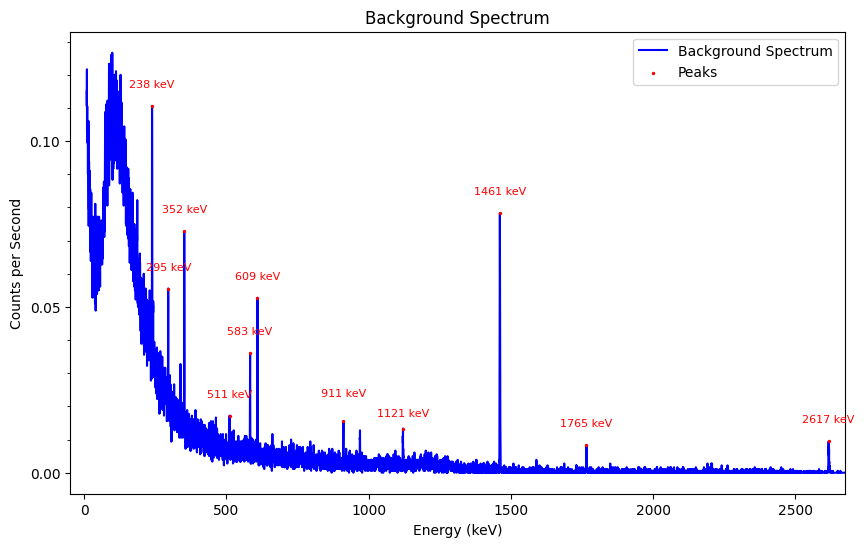

In [31]:
peak_energies = peaks_dict['Background']['Energy (keV)'].to_numpy()
peak_counts = peaks_dict['Background']['Counts per Second'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(background_dict['Energy (keV)'], background_dict['Counts per Second'], label='Background Spectrum', color='blue')
plt.title('Background Spectrum')
plt.scatter(peak_energies, peak_counts, color='red', label="Peaks", zorder=5, s=2)  # Plot peaks as red dots
# Add labels for each peak
for x, y in zip(peak_energies, peak_counts):
    x_rounded = round(x, 0)
    if x > 911.2 and x < 911.4:
        plt.text(x, y+.007, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
    else: 
        if x > 1120.5 and x < 1120.7:
            plt.text(x, y+.003, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
        else:
            plt.text(x, y+.005, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts per Second')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.05))
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
plt.xlim(left=-50, right=background_dict['Energy (keV)'].max())
plt.legend()
plt.show()

In [28]:
print(background_dict['Counts per Second'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
24           NaN
25      0.115000
26      0.110556
27      0.121667
28      0.103333
29      0.108889
30      0.110556
31      0.110000
32      0.100000
33      0.104444
34      0.099444
35      0.106111
36      0.105556
37      0.095556
38      0.090000
39      0.096111
40      0.091111
41      0.090000
42      0.090000
43      0.106111
44      0.105556
45      0.086667
46      0.074444
47      0.091667
48      0.084444
49      0.079444
50      0.093889
51      0.085000
52      0.078889
53      0.075000
54      0.083333
55      0.082778
56      0.091111
57      0.091111
58      0.0811

In [27]:
background_dict.loc[:24, ['Counts per Second']] = np.nan
